# ***Download libraries and their import***

# **--------------------------------------**

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt

#this step not mandatory , just for avoiding problem caused by 
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using TensorFlow backend
TensorFlow version: 2.13.0
Keras version: 0.1.7
KerasNLP version: 0.7.0


# ***Read Train_Data and identify different classes***

# **--------------------------------------**

In [3]:
#read train_data
DATA_DIR = '/kaggle/input/llm-detect-ai-generated-text/'
data_data_train_final = pd.read_csv(DATA_DIR + "train_essays.csv")
# Display information about the DataFrame
print(data_data_train_final.info())

# Collect unique values in the 'generated' column
classes = data_data_train_final['generated'].unique()
maxsize = data_data_train_final['text'].apply(len).max()

# Print the unique values 

print('\n\n ### THIS IS THE CLASSES THAT WE HAVE : #',classes,'### The CLASS 1 REPRESENT TEXTS GENERATED BY IA AND THE CLASS 0 REPRESENT TEXTS GENERATED BY HUMAN\n\n')
data_data_train_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


 ### THIS IS THE CLASSES THAT WE HAVE : # [0 1] ### The CLASS 1 REPRESENT TEXTS GENERATED BY IA AND THE CLASS 0 REPRESENT TEXTS GENERATED BY HUMAN




,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


*  We can see that we have 2 classes. And we need to work on the dimension of the texts because they are really huge.

# ***Visualisation of train data***

# **--------------------------------------**

Text(0.5, 1.0, 'Distibution of classes in in train essays')

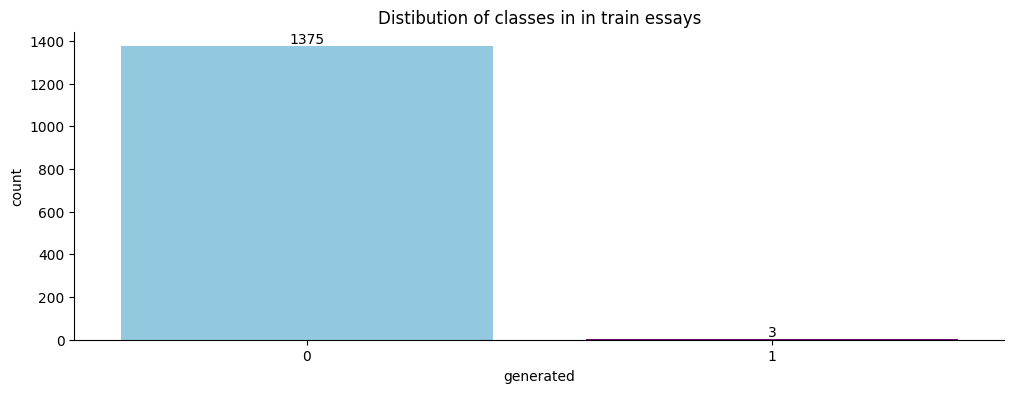

In [4]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=data_data_train_final,
                   x="generated", palette=['skyblue', 'purple'])

abs_values = data_data_train_final['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distibution of classes in in train essays")


generated
0    1375
1       3
Name: count, dtype: int64


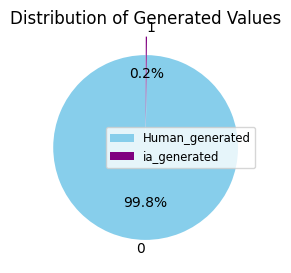

In [5]:
generated_count =data_data_train_final['generated'].value_counts()
print(generated_count)
labels = generated_count.index
explode = (0, 0.2)
plt.figure(figsize=(3,3))
plt.pie(generated_count, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90,colors=['skyblue', 'purple'])
plt.title('Distribution of Generated Values')
legend_labels = ['Human_generated', 'ia_generated']
plt.legend(legend_labels, loc='right',fontsize='small')
plt.show()

* We can see that our Data is not balanced . So we will move to adding data to our data set in order to balance it .

# **Add New data**

# **--------------------------------------**

label
0    27371
1    17497
Name: count, dtype: int64


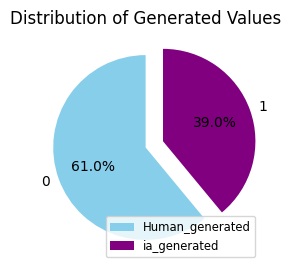

In [6]:
#LETS SEE THE DISTRIBUTION OF THE DATA THAT WE WILL ADD
new_data= pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv")
new_data.head(10)
generated_count =new_data['label'].value_counts()
print(generated_count)
labels = generated_count.index
explode = (0, 0.2)
plt.figure(figsize=(3,3))
plt.pie(generated_count, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90 ,colors=['skyblue', 'purple'])
plt.title('Distribution of Generated Values')
legend_labels = ['Human_generated', 'ia_generated']
plt.legend(legend_labels, loc='lower right',fontsize='small')
plt.show()

In [7]:
#Here we will choose randomly data from the data that we will use to make our dataset balanced
# we will choose randomly essays that was written by ia and others written with human. 
new_data.rename(columns={'label':'generated'}, inplace=True)     ## Rename data
random_generated_data_ai = new_data[new_data['generated'] == 1].sample(n=2070, random_state=42)     ## Select 2000 random data point of ai genrated
random_generated_data_human = new_data[new_data['generated'] == 0].sample(n=700, random_state=42)   ## Select 2000 random data point of Human genrated

train_essay_selected = data_data_train_final[['text', 'generated']]
data_train_final = pd.concat([train_essay_selected, random_generated_data_ai[['text', 'generated']],random_generated_data_human[['text', 'generated']]])    ## Create data set for training containg label and Text
data_train_final = data_train_final.sample(frac=1, random_state=42).reset_index(drop=True)

generated
0    2075
1    2073
Name: count, dtype: int64


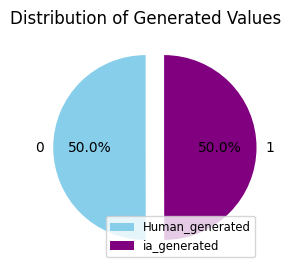

In [8]:
generated_count = data_train_final['generated'].value_counts()
print(generated_count)
labels = generated_count.index
explode = (0, 0.2)
plt.figure(figsize=(3,3))
plt.pie(generated_count, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90 ,colors=['skyblue', 'purple'])
plt.title('Distribution of Generated Values')
legend_labels = ['Human_generated', 'ia_generated']
plt.legend(legend_labels, loc='lower right',fontsize='small')
plt.show()

Now our Data is balanced

# **Add New Test Data**

# **--------------------------------------**

In [9]:
# Load the CSV file into a DataFrame
df_test1 = pd.read_csv('/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv')
df_test1.head()

# Remove the column labels
df_test = df_test1.iloc[2:]

# Keep only the desired columns and the first 10 rows for example
columns_to_keep = ['essay_id', 'text', 'source', 'fold']
df_test = df_test1[columns_to_keep].head(10)

# Display the resulting datasets
print("\n")
display(df_test1.head())
print("\n  • we removed the Labels from the data set and we kept the text and essays_id so that we can use this data to test our models. \n This is the final data set:\n")
print("\n")
display(df_test.head())


,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0



  • we removed the Labels from the data set and we kept the text and essays_id so that we can use this data to test our models. 
 This is the final data set:





,essay_id,text,source,fold
0,E897534557AF,"In recent years, technology has had a profoun...",mistral7binstruct_v2,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,persuade_corpus,2
2,af37ecf5,The electoral college is a symbol of mockery a...,train_essays,5
3,5EC2696BAD78,This is why I think the principle should allow...,persuade_corpus,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,llama_70b_v1,0


# **--------------------------------------**

 # **Transformer-Based model: BERT**

In [10]:
# # Assuming 'data_train_final.csv' is in the same directory as your script/notebook
# data_train_final = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/data_train_final.csv')
# test_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')

# # # Display the first few rows to inspect the data
# # print(data_train_final.head())

> **Imports**

In [11]:
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer
from nltk.tokenize import sent_tokenize
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
!pip install plotly
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

> # **Transformer-Based model: BERT**

# **--------------------------------------------------------------**

* **Step 1 : Data Split**
    * Split the data into training and validation sets

In [12]:
X_train, X_val, y_train, y_val = train_test_split(data_train_final['text'], data_train_final['generated'], test_size=0.2, random_state=42)

* **Step 2 : BertTokenizer Tokenization and Encoding**
    * We use the Hugging Face Transformers library to tokenize and encode text data for training a model, specifically using the BERT (Bidirectional Encoder Representations from Transformers) model 
        * **padding**=True indicates that the tokenizer should add padding tokens to ensure **all sequences have the same length**
        * **truncation**=True indicates that the tokenizer should truncate sequences that exceed the specified max_length.    
        * return_tensors='pt' indicates that the output should be in **PyTorch tensor format**.
    * In deep learning and neural networks, input data needs to be in numerical form for the model to process it effectively. So When we tokenize and encode text using a tokenizer like BERT, each word or subword in the text is represented by a **numerical ID** (integer). These numerical IDs are then **organized into tensors**, which are multi-dimensional arrays of numerical values. The tensor representation allows the model to perform mathematical operations and learn patterns in the data.        


In [13]:
# initializes a BERT tokenizer from the pre-trained 'bert-base-uncased' model.
tokenizer11 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, padding=True, truncation=True, max_length=128)

# Tokenizes and encodes the training & Validation text data using the initialized tokenizer
encoded_train = tokenizer11(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')
encoded_val = tokenizer11(X_val.tolist(), padding=True, truncation=True, return_tensors='pt')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

* **Step 3 : Create TensorDatasets**
    * The **TensorDataset** class from PyTorch is used to create a dataset by combining tensors. It takes multiple tensors as input arguments and creates a dataset where each element is a tuple containing corresponding elements from each input tensor.
    * Creating PyTorch TensorDataset objects for training and validation by combining the tokenized and encoded input data (token IDs and attention mask values) with their corresponding label.
    * **Each element** of **train_dataset** and **val_dataset** will be **a tuple of three elements**: the **token IDs**, **attention mask values**, **and the corresponding label**. This format is suitable for training and validating models in PyTorch, where we can easily iterate through batches during training while having access to both input data and labels.     

In [14]:
# Converts the training labels y_train & val labels y_val to PyTorch tensors.
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)

# Create TensorDatasets
# Combines the tokenized and encoded input data with the corresponding labels to create a PyTorch TensorDataset.
train_dataset = TensorDataset(encoded_train['input_ids'], encoded_train['attention_mask'], train_labels)
val_dataset = TensorDataset(encoded_val['input_ids'], encoded_val['attention_mask'], val_labels)

* **Step 4 : BertForSequenceClassification Model**
    * BertForSequenceClassification is a pre-trained BERT model fine-tuned for sequence classification tasks.Means : that the model is adapted for tasks involving sequences of text and classifying them into different categorie
        * from_pretrained loads the weights and architecture from the pre-trained 'bert-base-uncased' model, and with 2 output labels for the classification task

In [15]:
#  DataLoader for efficient processing
# This DataLoader will be used during training to efficiently load batches of data with a batch size of 16 and shuffle(mixed up) the data (shuffle=True).
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
# Checks if a GPU (cuda) is available and assigns the device accordingly.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Moves the model to the specified device (either GPU or CPU).
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

* **Step 5 : Define optimizer & learning rate**
    * AdamW is an optimizer from the Hugging Face Transformers library. It's an adaptation of the Adam optimizer with weight decay (hence the 'W').
        * model.parameters(): specifies the parameters(weights) of the BERT model that need to be optimized.
        * lr=2e-5: sets the learning rate for the optimizer to 2e-5.
        * correct_bias=False : is an argument used to avoid bias correction in AdamW.

In [16]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


* **Step 6 : Training the Model**

In [17]:
epochs = 10
# Initialize lists to store learning rates and losses
learning_rates = []
losses = []
validation_losses = []

for epoch in range(epochs):
# Training loop
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        # Get the current learning rate
        #The current learning rate is logged for visualization         
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)
        
        #The model parameters' gradients are zeroed (optimizer.zero_grad()) 
        optimizer.zero_grad()
        
        #and the forward pass is performed using model.
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        # Backpropagation and gradient clipping are applied to update the model's parameters.
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to avoid exploding gradients
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    losses.append(avg_train_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.2f}")
    # Validation loop
    model.eval()  # Set the model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():  # Disable gradient computation during validation
        for val_batch in val_loader:
            val_input_ids, val_attention_mask, val_labels = val_batch
            val_input_ids, val_attention_mask, val_labels = val_input_ids.to(device), val_attention_mask.to(device), val_labels.to(device)
            val_outputs = model(val_input_ids, attention_mask=val_attention_mask, labels=val_labels)
            val_loss = val_outputs.loss
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Average Validation Loss: {avg_val_loss:.2f}")

Epoch 1/10, Average Training Loss: 0.12
Epoch 1/10, Average Validation Loss: 0.07
Epoch 2/10, Average Training Loss: 0.06
Epoch 2/10, Average Validation Loss: 0.11
Epoch 3/10, Average Training Loss: 0.01
Epoch 3/10, Average Validation Loss: 0.03
Epoch 4/10, Average Training Loss: 0.00
Epoch 4/10, Average Validation Loss: 0.02
Epoch 5/10, Average Training Loss: 0.00
Epoch 5/10, Average Validation Loss: 0.03
Epoch 6/10, Average Training Loss: 0.00
Epoch 6/10, Average Validation Loss: 0.02
Epoch 7/10, Average Training Loss: 0.00
Epoch 7/10, Average Validation Loss: 0.03
Epoch 8/10, Average Training Loss: 0.00
Epoch 8/10, Average Validation Loss: 0.03
Epoch 9/10, Average Training Loss: 0.00
Epoch 9/10, Average Validation Loss: 0.03
Epoch 10/10, Average Training Loss: 0.00
Epoch 10/10, Average Validation Loss: 0.03


1.  **Learning Rates & Training Losses**

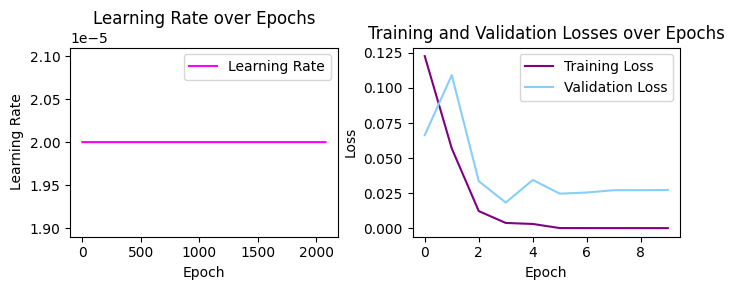

In [18]:
# Create a subplot with 1 row and 2 columns For Learning Rates
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.plot(range(len(learning_rates)), learning_rates, label='Learning Rate', color='magenta')
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()

# Create another subplot in the same row For Training Losses
# Plot training loss
plt.subplot(1, 2, 2)

plt.plot(range(len(losses)), losses, label='Training Loss', color='purple')

# Plot validation loss
plt.plot(range(len(validation_losses)), validation_losses, label='Validation Loss', color='lightskyblue')

# Add labels and legend
plt.title('Training and Validation Losses over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

* **Step 7 : Validation**
    * model.eval(): sets the model to evaluation mode, disabling features like dropout that are specific to training.

In [19]:
# Validation loop
model.eval()

# lists to store the predicted labels and actual labels during validation.
val_preds = []
val_labels = []
# torch.no_grad(): to disable gradient computation during the validation loop. Since gradients are not needed during validation.
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        #The predicted labels are extracted using torch.argmax along the specified dimension
        val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

1.  **Classification Report**

In [20]:
# Calculate validation accuracy
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Calculate other classification metrics
classification_metrics = classification_report(val_labels, val_preds)
print("Classification Report:")
print(classification_metrics)

Validation Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       410
           1       1.00      0.99      0.99       420

    accuracy                           0.99       830
   macro avg       0.99      0.99      0.99       830
weighted avg       0.99      0.99      0.99       830



2. **Confusion Matrix**

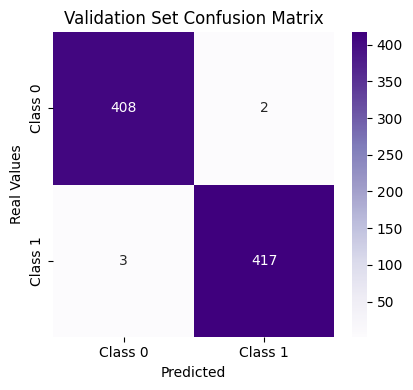

In [21]:
# Validation set confusion matrix
val_cm = confusion_matrix(val_labels, val_preds)

# Plot validation set confusion matrix
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real Values')

plt.tight_layout()
plt.show()

In [22]:
from prettytable import PrettyTable

# Test data processing
test_inputs = tokenizer11(df_test['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Move input tensor to the same device as the model
test_inputs = {key: value.to(device) for key, value in test_inputs.items()}

# Generate predictions using your trained model
with torch.no_grad():
    outputs = model(**test_inputs)
    logits = outputs.logits

# Assuming the first column of logits corresponds to the negative class (non-AI-generated) 
# and the second column corresponds to the positive class (AI-generated)
predictions = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()  # Move predictions back to CPU
 
# Create a PrettyTable instance
results_table = PrettyTable()
results_table.field_names = ["Text_id", "Predictions", "Explanation_of_Prediction"]

# Fill the table with results for each new text
for i in range(len(df_test)):
    text_id = df_test['essay_id'].iloc[i]
    Explanation_of_Prediction = predictions[i]
    prediction = 'AI Generated' if predictions[i] >= 0.5 else 'Human'
    results_table.add_row([text_id, Explanation_of_Prediction, prediction])  # Corrected variable name

# Print the result table
print(results_table)


+-----------------+---------------+---------------------------+
|     Text_id     |  Predictions  | Explanation_of_Prediction |
+-----------------+---------------+---------------------------+
|   E897534557AF  |   0.99999404  |        AI Generated       |
|   DFBA34FFE11D  |  0.0003667867 |           Human           |
|     af37ecf5    |  7.845715e-06 |           Human           |
|   5EC2696BAD78  |  5.319507e-05 |           Human           |
| llama_70b_v1843 |   0.99999404  |        AI Generated       |
|   30D7FD691AE3  | 7.3944124e-05 |           Human           |
|   8E91F0997B77  |  3.669934e-05 |           Human           |
|     9124e664    |  8.069697e-06 |           Human           |
|   9ABF7B48B802  |  8.562858e-06 |           Human           |
|   E7F9A77683D2  |   0.99999416  |        AI Generated       |
+-----------------+---------------+---------------------------+
